In [1]:
import requests
from PIL import Image
#import json

In [2]:
subscription_key ='19fc85f0a944448292a791aa4ee5f6d9'

# with open('secret.json') as f:
#     secret_json = json.load(f)
# subscription_key = secret_json['subscription_key']

In [3]:
assert subscription_key #判定する時に使う(変数に文字列が入っているか確かめる)

In [4]:
face_api_url ='https://20201129sota.cognitiveservices.azure.com/face/v1.0/detect'

In [20]:
img = Image.open('image1.jpg')
#画像をバイナリデータで取り出す
with open('image1.jpg', 'rb') as f:
    binary_img = f.read()

In [12]:
#urlではなく、ローカルから画像を読み込むからheaderに1つ付け加える。content-typeが通常URLがベースだがstream(画像)を送りますよということ
headers = {
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': subscription_key}

params = {
    'returnFaceId': 'true',
    'returnFaceAttributes':'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise'
}

#requests.postでPostリクエストで送りますよということ
res = requests.post(face_api_url, params=params,
                         headers=headers, data=binary_img)

In [16]:
result = res.json()
rect = result[0]['faceRectangle']
rect

{'top': 200, 'left': 327, 'width': 199, 'height': 199}

In [17]:
from PIL import ImageDraw

In [22]:
draw = ImageDraw.Draw(img)

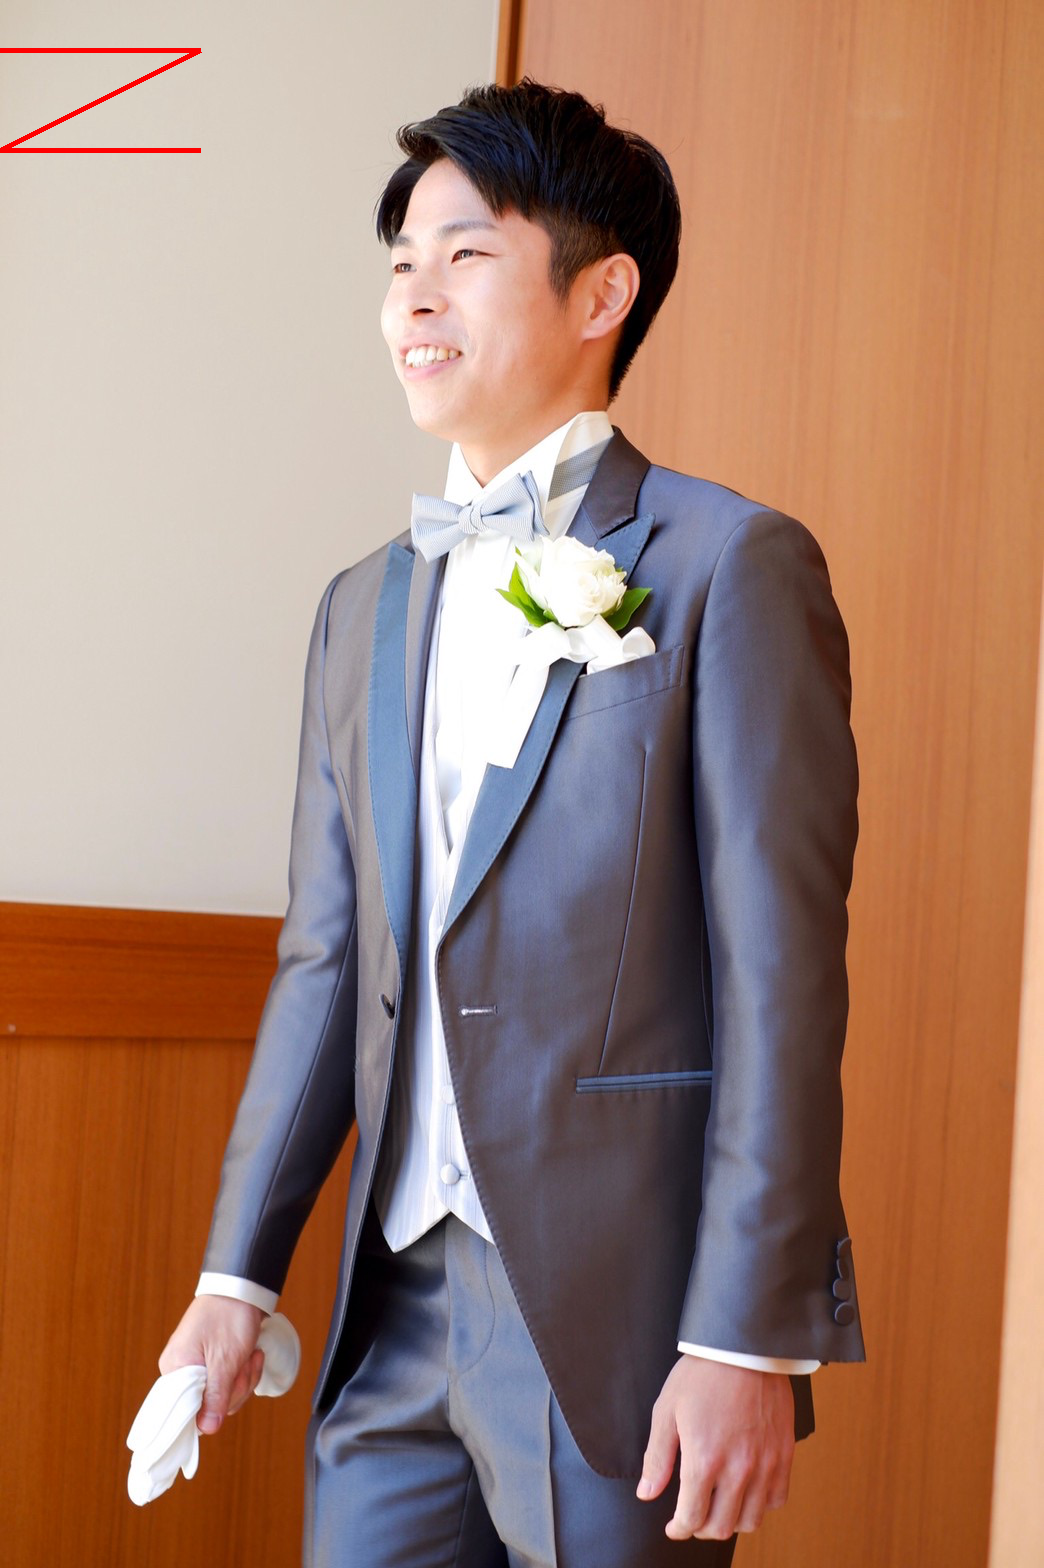

In [19]:
draw.line([(0,50),(200,50),(0,150),(200,150)], fill='red', width=5)
img

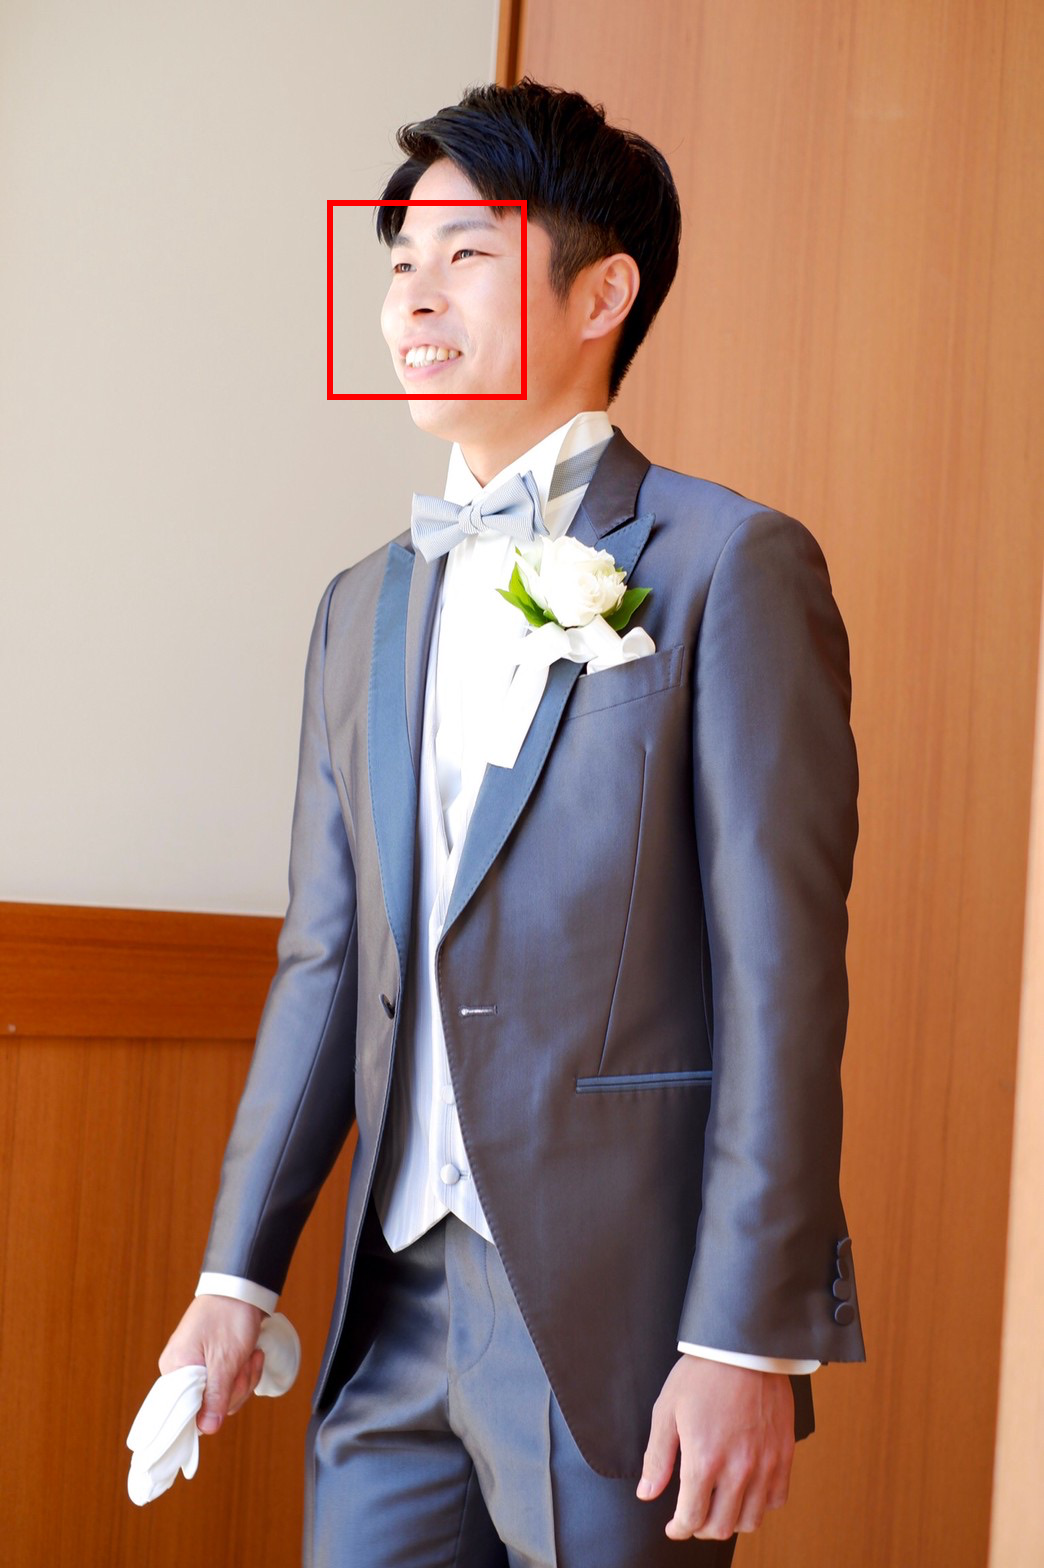

In [24]:
draw.rectangle([(rect['left'], rect['top']), (rect['left']+rect['width'], rect['top']+rect['height'])], fill=None, outline='red', width=6)
img

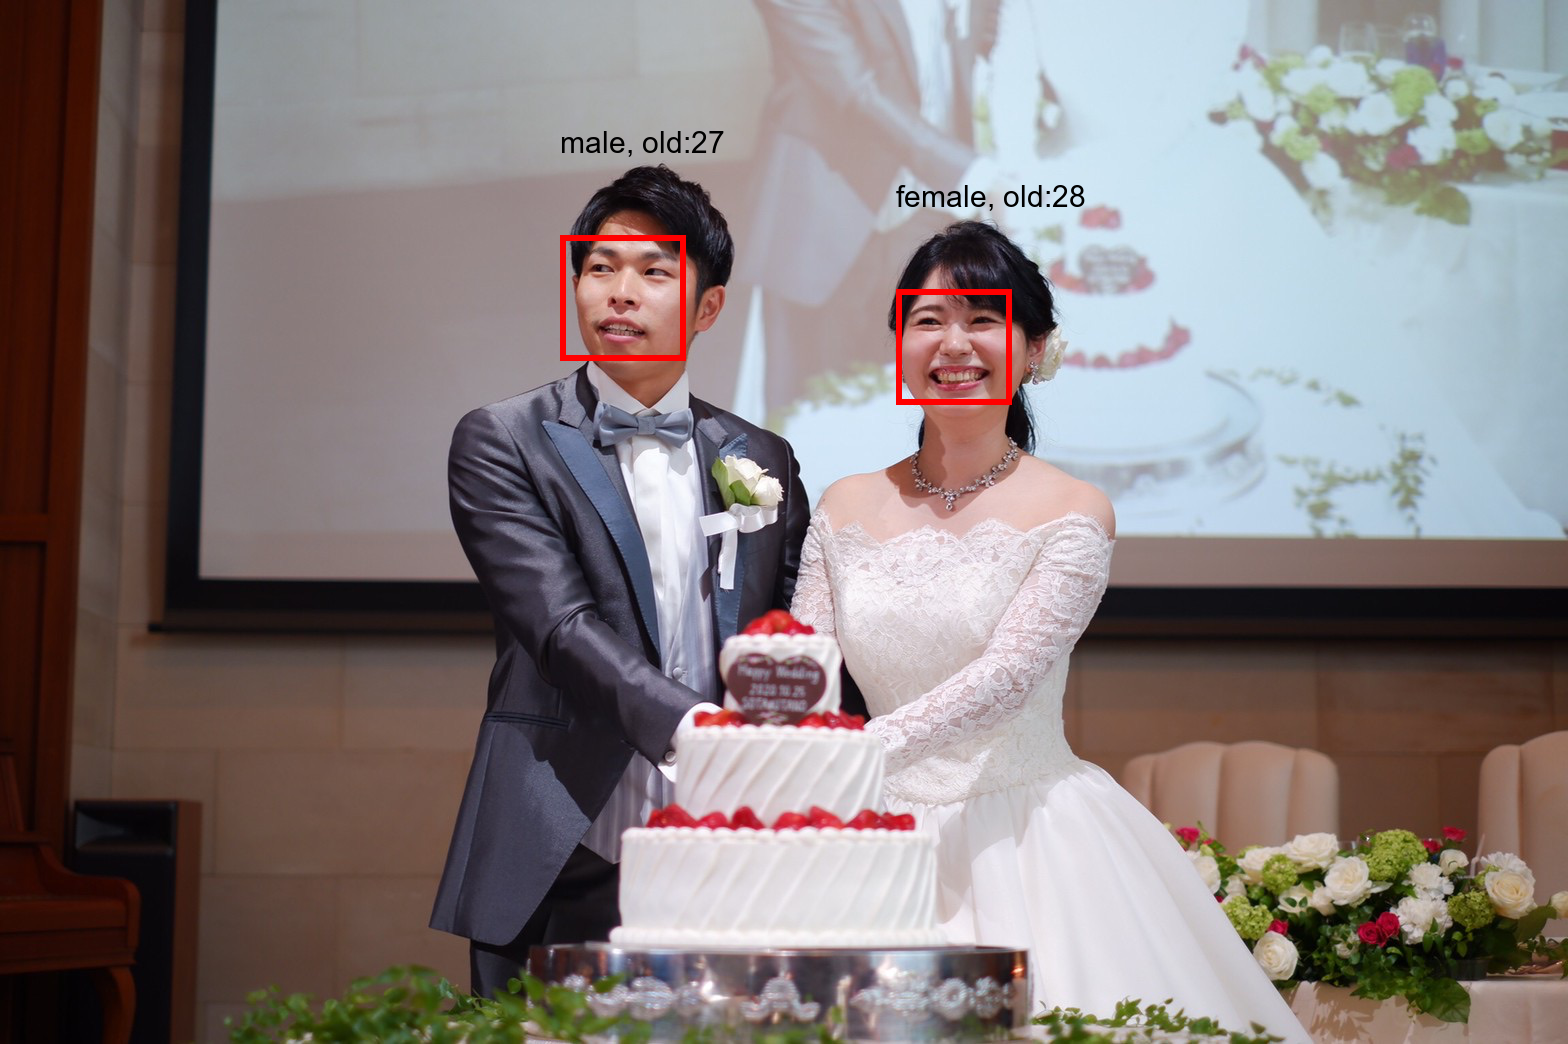

In [63]:
import requests
from PIL import Image
from PIL import ImageDraw, ImageFont
import math
#import json

subscription_key ='19fc85f0a944448292a791aa4ee5f6d9'

# with open('secret.json') as f:
#     secret_json = json.load(f)
# subscription_key = secret_json['subscription_key']
assert subscription_key #判定する時に使う(変数に文字列が入っているか確かめる)
face_api_url ='https://20201129sota.cognitiveservices.azure.com/face/v1.0/detect'

img = Image.open('image0.jpg')
#画像をバイナリデータで取り出す
with open('image0.jpg', 'rb') as f:
    binary_img = f.read()
    
#urlではなく、ローカルから画像を読み込むからheaderに1つ付け加える。content-typeが通常URLがベースだがstream(画像)を送りますよということ
headers = {
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': subscription_key}

params = {
    'returnFaceId': 'true',
    'returnFaceAttributes':'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise'
}

#requests.postでPostリクエストで送りますよということ
res = requests.post(face_api_url, params=params,
                         headers=headers, data=binary_img)
results = res.json()
font = ImageFont.truetype("arial.ttf", 30)
for result in results:
    rect = result['faceRectangle']
    gender = result['faceAttributes']['gender']
    old = math.floor(result['faceAttributes']['age'])
    draw = ImageDraw.Draw(img)
    draw.rectangle([(rect['left'], rect['top']), (rect['left']+rect['width'], rect['top']+rect['height'])], fill=None, outline='red', width=6)
    draw.text((rect['left'], rect['top']-110), gender+', old:'+str(old),font=font, fill='black')
img

In [64]:
import requests
from PIL import Image
from PIL import ImageDraw, ImageFont
import math
import io
#import json

subscription_key ='19fc85f0a944448292a791aa4ee5f6d9'

# with open('secret.json') as f:
#     secret_json = json.load(f)
# subscription_key = secret_json['subscription_key']
assert subscription_key #判定する時に使う(変数に文字列が入っているか確かめる)
face_api_url ='https://20201129sota.cognitiveservices.azure.com/face/v1.0/detect'

img = Image.open('image0.jpg')
#画像をバイナリデータで取り出す
with io.BytesIO() as output:
    img.save(output, format='JPEG')
    binary_img = output.getvalue() #バイナリデータの取得
    
#urlではなく、ローカルから画像を読み込むからheaderに1つ付け加える。content-typeが通常URLがベースだがstream(画像)を送りますよということ
headers = {
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': subscription_key}

params = {
    'returnFaceId': 'true',
    'returnFaceAttributes':'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise'
}

#requests.postでPostリクエストで送りますよということ
res = requests.post(face_api_url, params=params,
                         headers=headers, data=binary_img)
results = res.json()
font = ImageFont.truetype("arial.ttf", 30)
for result in results:
    rect = result['faceRectangle']
    gender = result['faceAttributes']['gender']
    old = math.floor(result['faceAttributes']['age'])
    draw = ImageDraw.Draw(img)
    draw.rectangle([(rect['left'], rect['top']), (rect['left']+rect['width'], rect['top']+rect['height'])], fill=None, outline='red', width=6)
    draw.text((rect['left'], rect['top']-110), gender+', old:'+str(old),font=font, fill='black')
img

{'faceId': '9b850f97-73bf-4330-82c3-9f48aa05cb74',
 'faceRectangle': {'top': 289, 'left': 896, 'width': 115, 'height': 115},
 'faceAttributes': {'smile': 1.0,
  'headPose': {'pitch': 2.6, 'roll': -0.4, 'yaw': -9.5},
  'gender': 'female',
  'age': 28.0,
  'facialHair': {'moustache': 0.0, 'beard': 0.0, 'sideburns': 0.0},
  'glasses': 'NoGlasses',
  'emotion': {'anger': 0.0,
   'contempt': 0.0,
   'disgust': 0.0,
   'fear': 0.0,
   'happiness': 1.0,
   'neutral': 0.0,
   'sadness': 0.0,
   'surprise': 0.0},
  'blur': {'blurLevel': 'low', 'value': 0.09},
  'exposure': {'exposureLevel': 'goodExposure', 'value': 0.57},
  'noise': {'noiseLevel': 'low', 'value': 0.0},
  'makeup': {'eyeMakeup': True, 'lipMakeup': True},
  'accessories': [],
  'occlusion': {'foreheadOccluded': False,
   'eyeOccluded': False,
   'mouthOccluded': False},
  'hair': {'bald': 0.03,
   'invisible': False,
   'hairColor': [{'color': 'black', 'confidence': 1.0},
    {'color': 'other', 'confidence': 0.65},
    {'color': 

In [ ]:
import io
with io.BytesIO() as output:
    img.save(output, format='JPEG')
    binary_img = output.getvalue() #バイナリデータの取得